In [ ]:
pip install tensorflow==2.14.1
pip install hls4ml
!pip install Qkeras
!pip install ONNX
pip install torch
pip install pyparsing
pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install pydot
!pip install pydotplus
!pip install graphviz
!pip install pydot

In [2]:
!which python

/home/prarbdh/hls4ml-tutorial/new/bin/python


In [2]:
import tensorflow
import hls4ml
import h5py
import matplotlib.pyplot
import pandas
import seaborn
import pydot
import graphviz
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

2024-04-23 18:51:07.960203: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 18:51:11.541036: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 18:51:11.541062: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 18:51:11.547576: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-23 18:51:12.598090: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 18:51:12.600108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
tensorflow.__version__

'2.14.1'

In [4]:
from keras.models import load_model
model = load_model('model(2).h5')

In [7]:
config = hls4ml.utils.config_from_keras_model(model,granularity='name')
#plotting.print_dict(config)

Interpreting Sequential
Topology:
Layer name: dense_13_input, layer type: InputLayer, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: dense_13, layer type: Dense, input shapes: [[None, 20]], output shape: [None, 128]
Layer name: dense_14, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 32]
Layer name: dense_15, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 16]
Layer name: dense_16, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 1]


In [8]:
# from hls4ml.model import profiling
# hls_model_ = hls4ml.converters.convert_from_keras_model(model,hls_config=config,output_dir='/models/out1',fpga_part='xc7z020clg484-1')
from hls4ml.model import profiling
hls_model_ = hls4ml.converters.convert_from_keras_model(model,hls_config=config,output_dir='/models/out1')

Interpreting Sequential
Topology:
Layer name: dense_13_input, layer type: InputLayer, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: dense_13, layer type: Dense, input shapes: [[None, 20]], output shape: [None, 128]
Layer name: dense_14, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 32]
Layer name: dense_15, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 16]
Layer name: dense_16, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 1]
Creating HLS model


In [9]:
hls4ml.utils.plot_model(hls_model_, show_shapes=True, show_precision=True, to_file='plot.png')

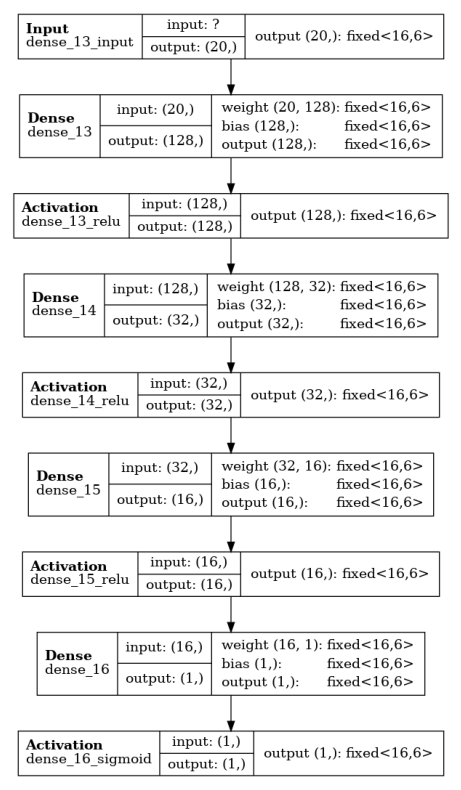

In [10]:
plt.figure(figsize=(10, 10))  # Adjust the size as needed
img = plt.imread('plot.png')
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

Interpreting Sequential
Topology:
Layer name: dense_13_input, layer type: InputLayer, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: dense_13, layer type: Dense, input shapes: [[None, 20]], output shape: [None, 128]
Layer name: dense_14, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 32]
Layer name: dense_15, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 16]
Layer name: dense_16, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 1]
Creating HLS model
Profiling weights (before optimization)
Profiling weights (final / after optimization)


(<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 None,
 None)

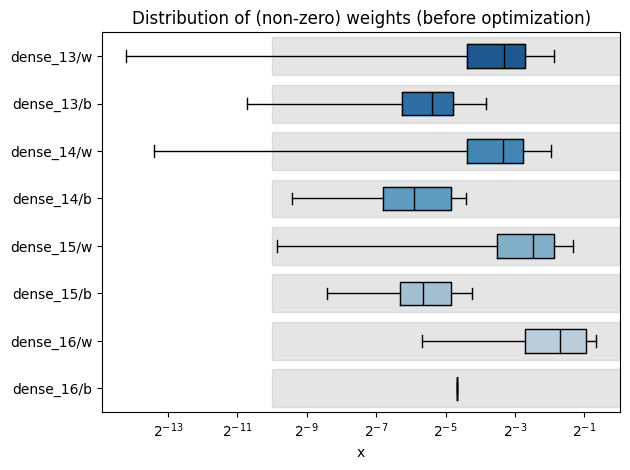

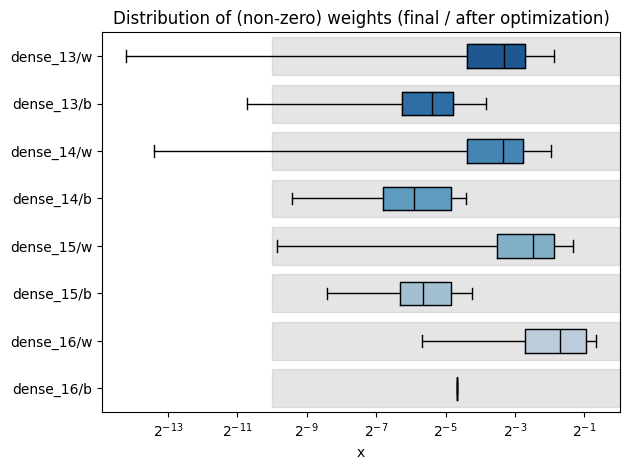

In [11]:
profiling.numerical(model, hls_model=hls_model_)

In [12]:
import os
# new_path = '/home/prarbdh/VIVADO/Vivado/2018.2/bin'
# os.environ['PATH'] += os.pathsep + new_path
os.environ['PATH'] = '/home/prarbdh/VIVADO/Vivado/2018.2/bin:' + os.environ['PATH']
# os.environ['PATH'] = '/opt/Xilinx/Vivado/2018.2/bin/vivado_hls:' + os.environ['PATH']

# Use Vivado HLS to synthesize the model
# This might take several minutes
# hls_model.build()

# # Print out the report if you want
# hls4ml.report.read_vivado_report('my-hls-test')

In [13]:
# Load the Keras model
keras_model = load_model('model(2).h5')

# Convert the Keras model to an HLS-compatible format
config = hls4ml.utils.config_from_keras_model(keras_model)
print(config)

Interpreting Sequential
Topology:
Layer name: dense_13_input, layer type: InputLayer, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: dense_13, layer type: Dense, input shapes: [[None, 20]], output shape: [None, 128]
Layer name: dense_14, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 32]
Layer name: dense_15, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 16]
Layer name: dense_16, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 1]
{'Model': {'Precision': 'fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency', 'BramFactor': 1000000000, 'TraceOutput': False}}


In [14]:
hls_model = hls4ml.converters.convert_from_keras_model(keras_model, hls_config=config, output_dir='output1')

Interpreting Sequential
Topology:
Layer name: dense_13_input, layer type: InputLayer, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: dense_13, layer type: Dense, input shapes: [[None, 20]], output shape: [None, 128]
Layer name: dense_14, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 32]
Layer name: dense_15, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 16]
Layer name: dense_16, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 1]
Creating HLS model


In [14]:
hls_model.build()


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2018.2 (64-bit)
  **** SW Build 2258646 on Thu Jun 14 20:02:38 MDT 2018
  **** IP Build 2256618 on Thu Jun 14 22:10:49 MDT 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

source /home/prarbdh/VIVADO/Vivado/2018.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/prarbdh/VIVADO/Vivado/2018.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'prarbdh' on host 'prarbdh-HP-ProDesk-600-G4-PCI-MT' (Linux_x86_64 version 6.5.0-17-generic) on Thu Apr 11 23:25:09 IST 2024
INFO: [HLS 200-10] On os Ubuntu 22.04.3 LTS
INFO: [HLS 200-10] In directory '/home/prarbdh/hls4ml-tutorial/output1'
INFO: [HLS 200-10] Opening project '/home/prarbdh/hls4ml-tutorial/output1/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'firmwa